In [4]:
import numpy as np
import pandas as pd


## Data Loading

In [5]:
data=pd.read_csv("kyphosis.csv")
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [6]:
data.shape

(81, 4)

## Check Null Values

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


## Select X Values

In [8]:
x=data.drop("Kyphosis",axis=1)
x.head()

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15


## Select Y Values

In [9]:
y=data['Kyphosis']
y.head()


0     absent
1     absent
2    present
3     absent
4     absent
Name: Kyphosis, dtype: object

## Check Distribution


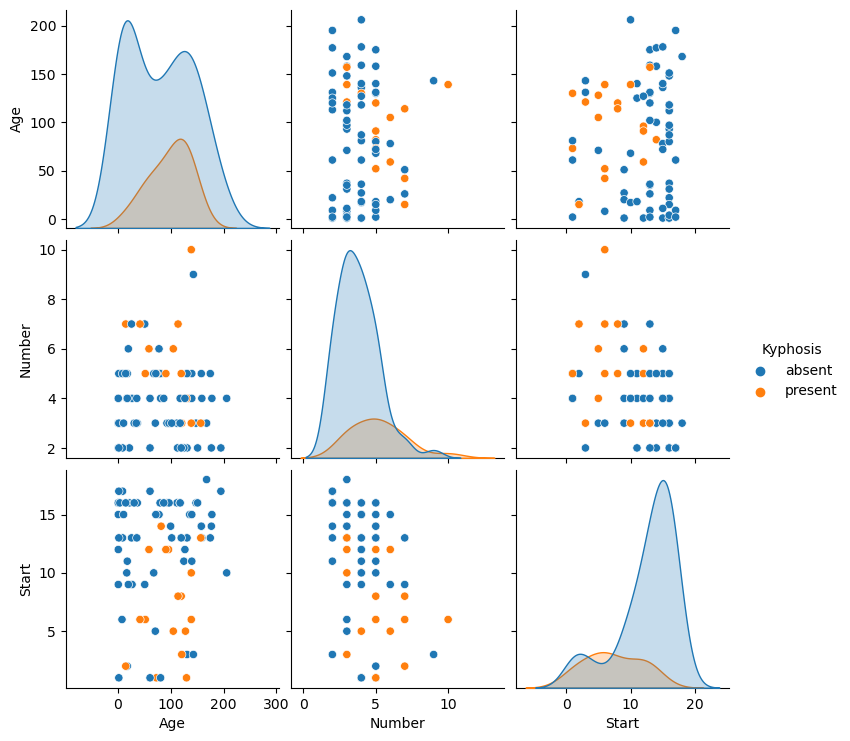

In [10]:
import seaborn as sns
sns.pairplot(data , hue="Kyphosis")


In [11]:
sns.countplot(x='Kyphosis',data=data)

<AxesSubplot:xlabel='Kyphosis', ylabel='count'>

<AxesSubplot:xlabel='Kyphosis', ylabel='count'>

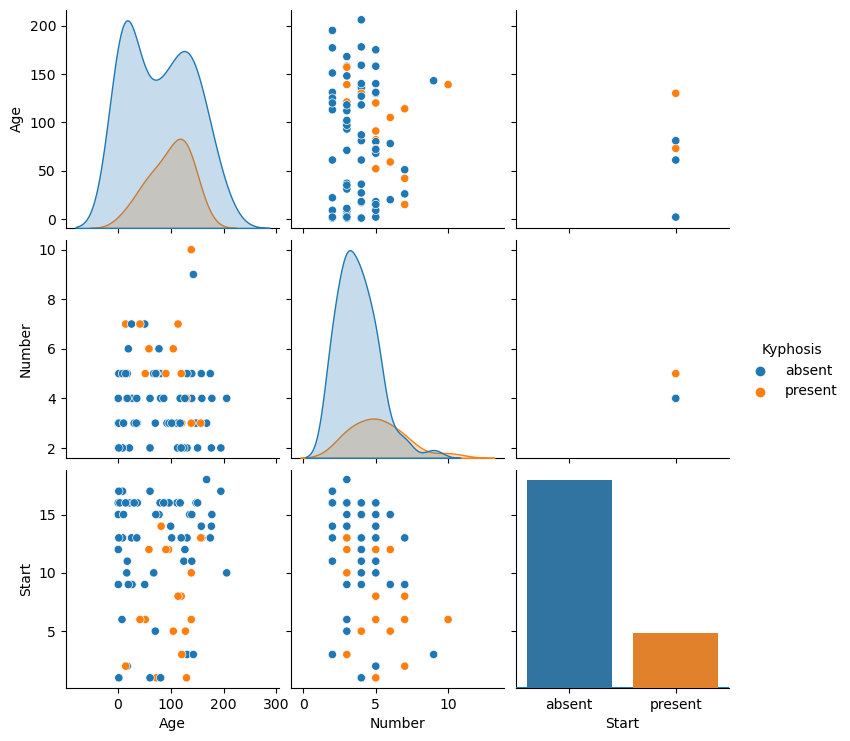

In [12]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
sns.pairplot(data, hue="Kyphosis")  # This should display automatically in a Jupyter Notebook

sns.countplot(x='Kyphosis', data=data)  # This should display automatically in a Jupyter Notebook

##  Data Preprocessing 

In [13]:
## select train and test dataset

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [14]:
x_train.shape

(56, 3)

In [15]:
x_test.shape

(25, 3)

##  Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [17]:
pred = model.predict(x_test)
pred

array(['absent', 'absent', 'present', 'present', 'present', 'present',
       'present', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent'], dtype=object)

In [18]:
y_test

41     absent
76    present
71     absent
61    present
31     absent
39    present
23     absent
5      absent
67     absent
68     absent
77     absent
43     absent
59     absent
37    present
11     absent
65     absent
47     absent
24    present
0      absent
56     absent
30     absent
19     absent
36     absent
3      absent
27     absent
Name: Kyphosis, dtype: object

In [19]:
#                         Check Accuracy 

from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.76

In [20]:
#                        Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[17,  3],
       [ 3,  2]], dtype=int64)

In [21]:
## this is the simple therefore can be happen underfitting

## Random Forest Algorithm

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
model=RandomForestClassifier(n_estimators=50) # n_estimators--> Decision Tree
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [24]:
pred = model.predict(x_test)
pred

array(['absent', 'absent', 'absent', 'present', 'absent', 'present',
       'present', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent'], dtype=object)

In [25]:
y_test

41     absent
76    present
71     absent
61    present
31     absent
39    present
23     absent
5      absent
67     absent
68     absent
77     absent
43     absent
59     absent
37    present
11     absent
65     absent
47     absent
24    present
0      absent
56     absent
30     absent
19     absent
36     absent
3      absent
27     absent
Name: Kyphosis, dtype: object

In [26]:
#                         Check Accuracy 

from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.88

In [27]:
#                        Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[19,  1],
       [ 2,  3]], dtype=int64)

In [28]:
data['Kyphosis'].value_counts()
# this is effected accuray of this model

absent     64
present    17
Name: Kyphosis, dtype: int64

## Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [31]:
pred=nb.predict(x_test)
pred

array(['absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'present',
       'present', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent'], dtype='<U7')

In [32]:
y_test

41     absent
76    present
71     absent
61    present
31     absent
39    present
23     absent
5      absent
67     absent
68     absent
77     absent
43     absent
59     absent
37    present
11     absent
65     absent
47     absent
24    present
0      absent
56     absent
30     absent
19     absent
36     absent
3      absent
27     absent
Name: Kyphosis, dtype: object

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.76

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[17,  3],
       [ 3,  2]], dtype=int64)